In [ ]:
# Final Project Submission

Please fill out:
* Student name: Sanayet Nelly Sankaine
* Student pace: Full Time
* Scheduled project review date/time: 15-09-2023
* Instructor name:
* Blog post URL:https://github.com/SankaineSanayet/dsc-phase-1-project-v2-4/blob/master/README.md
    


# Introduction
In this notebook we analyze datasets from different sources to identify the different trends and understand the ever changing movie production industry. The insights are to help Microsoft in optimizing their budget, identifying existing and emerging trends,understanding the industry and make successful decisions based on the insights. 
The sources of the datasets are:
  1.sqlite database ('im.db')
  2.csv file ("bom.movie_gross.csv")

# Import libraries 

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from datetime import datetime

In [237]:
# Connect the file to the database
conn = sqlite3.connect('im.db')

In [255]:
# Execute SQL statements to rename columns in the "movie_basics" table
query_rename_title = "ALTER TABLE movie_basics RENAME COLUMN primary_title TO title;"
query_rename_year = "ALTER TABLE movie_basics RENAME COLUMN start_year TO year;"

# Execute the statements
conn.execute(query_rename_title)
conn.execute(query_rename_year)

OperationalError: no such column: "primary_title"

# Analyze the data

In [239]:
# Read the data from the movie_basics table
query = "SELECT * FROM movie_basics"
df_sqlite = pd.read_sql_query(query, conn)
df_sqlite

,movie_id,title,original_title,year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


# Data Cleaning
  Check for null and duplicated values and either drop them or replace them

In [240]:
# Drop the rows with null values
df_sqlite.dropna(inplace = True)
df_sqlite

,movie_id,title,original_title,year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


# Exploratory Data Analysis
 In this step we analyze the datasets from the movie_basics and movie_ratings tables and explore the data and it's correlation to each other. The aim is to answer certain questions which are important in making certain insights

#### 1. Identify the top 10 movie titles and the genre based on the averagerating value from the highest to the lowest

In [242]:
#Query movie basics and movie ratings tables to obtain top 10 movies
df_sqlite = pd.read_sql("""SELECT DISTINCT b.genres, r.averagerating, b.title, b.year
             FROM movie_basics as b
             JOIN movie_ratings as r ON r.movie_id = b.movie_id
              GROUP BY averagerating , year
             ORDER BY averagerating DESC, year DESC
             ;""",conn).head(10)
df_sqlite

,genres,averagerating,title,year
0,Documentary,10.0,Fly High: Story of the Disc Dog,2019
1,Documentary,10.0,Exteriores: Mulheres Brasileiras na Diplomacia,2018
2,Drama,10.0,Dog Days in the Heartland,2017
3,Documentary,10.0,Requiem voor een Boom,2016
4,Documentary,10.0,I Was Born Yesterday!,2015
5,Documentary,10.0,Hercule contre Hermès,2012
6,"Crime,Documentary",10.0,Freeing Bernie Baran,2010
7,Drama,9.9,Gini Helida Kathe,2019
8,Documentary,9.9,The Wedding Present: Something Left Behind,2018
9,Action,9.8,Grisaia: Phantom trigger the animation 02. Sou...,2019


#### 2.Identify the top 3 genres featured in the movie box sets
   -Find this by calculating the total sum of each genre featured in the datasets using the COUNT() function
   -Use the LIMIT function to limit it to the top 3 genres


In [243]:
# Query the movie basics table to obtain the mode of each genre 
df_sqlite = pd.read_sql("""SELECT genres, COUNT(*) AS genre_count
                FROM movie_basics
               GROUP BY genres
               ORDER BY genre_count DESC 
               LIMIT 3;
             """,conn).head(10)
df_sqlite

,genres,genre_count
0,Documentary,32185
1,Drama,21486
2,Comedy,9177


#### 3.Analyze genre performance based on the average ratings between the years 2019 and 2009 and visually represent it on a bar graph

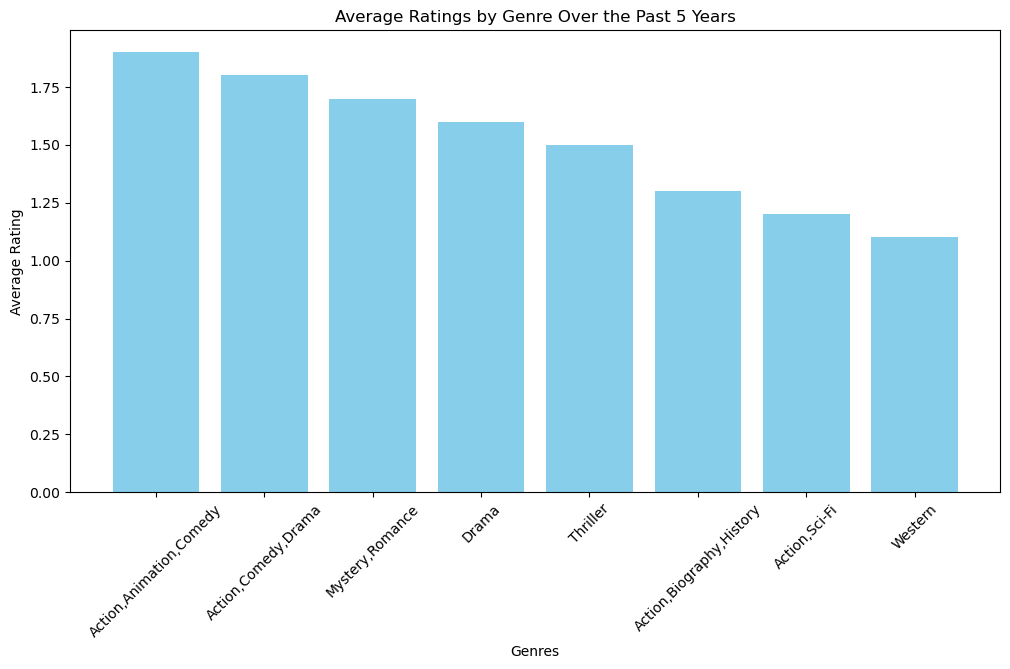

,genres,averagerating,year
0,Drama,1.0,2010
1,Western,1.1,2011
2,"Action,Sci-Fi",1.2,2010
3,"Action,Biography,History",1.3,2012
4,Thriller,1.4,2019
5,Thriller,1.5,2010
6,Drama,1.6,2010
7,"Mystery,Romance",1.7,2010
8,"Action,Comedy,Drama",1.8,2010
9,"Action,Animation,Comedy",1.9,2012


In [232]:
df_sqlite = pd.read_sql("""SELECT DISTINCT b.genres, r.averagerating, b.year
             FROM movie_basics as b
             JOIN movie_ratings as r ON r.movie_id = b.movie_id
              GROUP BY averagerating 
             ORDER BY averagerating 
             ;""",conn).head(10)


df_sqlite = df_sqlite[df_sqlite['year'].between(2010, 2019)]

# Sort genres by average rating (optional)
genre_avg_ratings = df_sqlite.sort_values(by='averagerating', ascending=False)

# Create a bar plot to visualize genre performance
plt.figure(figsize=(12, 6))
plt.bar(genre_avg_ratings['genres'], genre_avg_ratings['averagerating'], color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Genre Over the Past 5 Years')
plt.xticks(rotation=45)
plt.show()
df_sqlite

# Read the CSV Data File

In [245]:
# Read the data from the csv file and load it into a dataframe called df_cvs
df_csv= pd.read_csv("bom.movie_gross.csv")

df_csv

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


# Data Cleaning with Pandas
 Check for duplicated data, null values and inconsistent data in the file

In [253]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [142]:
# Check for duplicated data in the dataset
df_csv.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool

In [143]:
# Check for null values in the dataset
df_csv.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [144]:
# Drop the rows with null values
df_csv = df.dropna(subset=['studio','domestic_gross', 'foreign_gross'])
df_csv


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [145]:
# Confirm that the null values have been dropped
df_csv.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [254]:
df_csv.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


# Data Analysis with Pandas

#### 1. Find the average amount of foreign gross and domestic gross earned by the movie company

In [149]:
# Convert the values in this column to numeric values
df_csv.loc[:, 'foreign_gross'] = pd.to_numeric(df_csv['foreign_gross'], errors='coerce')

# Calculate the average domestic gross and foreign gross using the mean() function
average_domestic_gross = df_csv['domestic_gross'].mean()
average_foreign_gross = df_csv['foreign_gross'].mean()

# Print the results
print(f'Average Domestic Gross: ${average_domestic_gross:.2f}')
print(f'Average Foreign Gross: ${average_foreign_gross:.2f}')

Average Domestic Gross: $47019840.20
Average Foreign Gross: $75979668.67


#### 2. Identify the perfomance/trend of domestic and foreign gross over the years and represent it visually

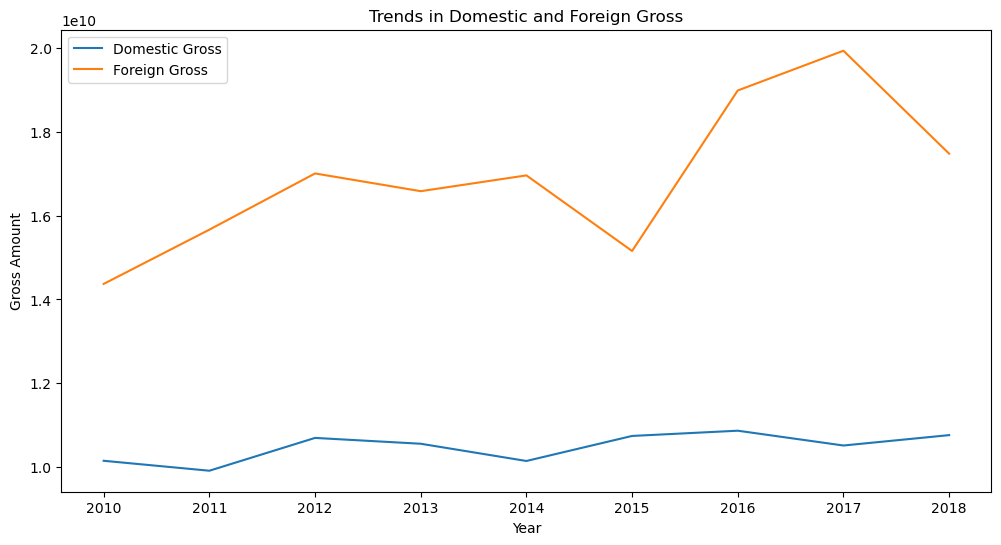

In [153]:
# Convert the values in this column to numeric values
df_csv.loc[:, 'year'] = pd.to_numeric(df_csv['year'], errors='coerce')

# Calculate the sum of gross values for each year
yearly_gross = df_csv.groupby('year').agg({'domestic_gross': 'sum', 'foreign_gross': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yearly_gross['year'], yearly_gross['domestic_gross'], label='Domestic Gross')
plt.plot(yearly_gross['year'], yearly_gross['foreign_gross'], label='Foreign Gross')
plt.xlabel('Year')
plt.ylabel('Gross Amount')
plt.title('Trends in Domestic and Foreign Gross')
plt.legend()
plt.show()







#### 3.Identify the top 10 movies based on average ratings and their respective domestic and foreign gross values

In [185]:
#Create a new DataFrame and load the columns into it
df_csv_subset = df_csv[['title', 'domestic_gross', 'foreign_gross']]

# Query the 'movie_ratings' table to get the average rating for each movie
average_ratings_query = """SELECT b.title, r.averagerating, b.genres
             FROM movie_basics as b
             JOIN movie_ratings as r ON r.movie_id = b.movie_id
              GROUP BY title 
             ORDER BY averagerating DESC
             ;"""

# Execute the query and fetch the results into a DataFrame
average_ratings_df = pd.read_sql_query(average_ratings_query, conn)

# Merge the average_ratings_df with df_csv_subset using the 'title' column
merged_data = pd.merge(average_ratings_df, df_csv_subset, on='title', how='inner')

# Sort the merged DataFrame by 'average_rating' in descending order and select the top 10 movies
top_10_movies = merged_data.sort_values(by='averagerating', ascending=False).head(10)

# Display the top 10 movies with the highest average rating and their associated domestic and foreign gross
top_10_movies


,title,averagerating,genres,domestic_gross,foreign_gross
0,The Wall,9.2,Documentary,1800000.0,2700000.0
2,Burn the Stage: The Movie,8.8,"Documentary,Music",4200000.0,16100000.0
1,Inception,8.8,"Action,Adventure,Sci-Fi",292600000.0,535700000.0
3,Eyes Wide Open,8.7,"Documentary,History",26300.0,250000.0
4,Senna,8.6,"Biography,Documentary,Sport",1600000.0,6600000.0
5,Kin,8.6,"Drama,Music",5700000.0,4300000.0
6,Interstellar,8.6,"Adventure,Drama,Sci-Fi",188000000.0,489400000.0
7,Whiplash,8.5,"Drama,Music",13100000.0,35900000.0
8,Dangal,8.5,"Action,Biography,Drama",12400000.0,290500000.0
9,Avengers: Infinity War,8.5,"Action,Adventure,Sci-Fi",678800000.0,NaN


#### 4. Identify the domestic income trend over the years

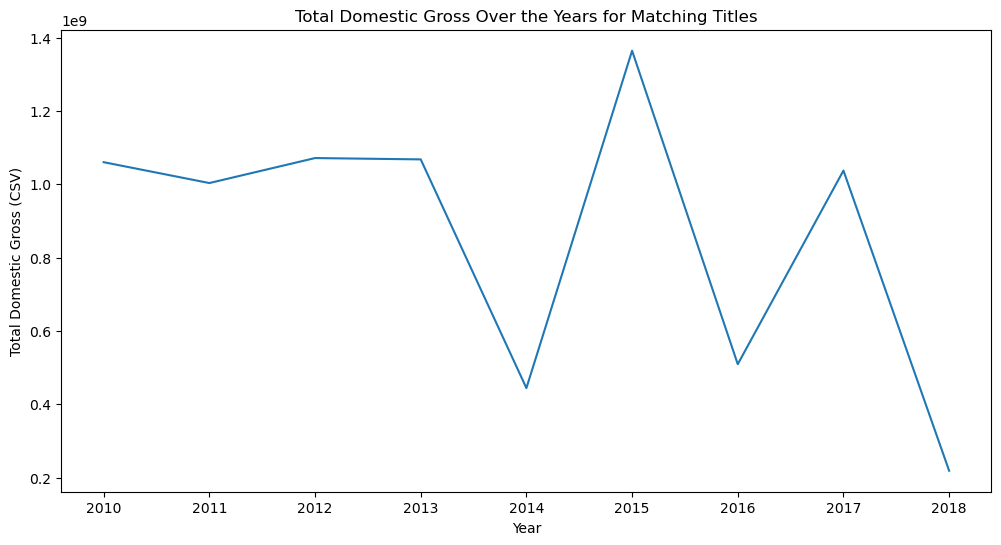

In [207]:
#Merge the csv and sqlite data files based on the common columns
merged_data = pd.merge(df_sqlite, df_csv, on=['year', 'title'], how='inner')

# Group by year and calculate the total domestic gross
total_domestic_gross = merged_data.groupby('year')['domestic_gross'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(total_domestic_gross['year'], total_domestic_gross['domestic_gross'])
plt.xlabel('Year')
plt.ylabel('Total Domestic Gross (CSV)')
plt.title('Total Domestic Gross Over the Years for Matching Titles')
plt.show()

#### 5. Identify the average rating trend of movies by viewers over the years

   year  averagerating
0  2010            6.8
1  2011            7.8
2  2012            1.9
3  2013            7.0
4  2014            6.1
5  2015            6.6
6  2016            7.1
7  2017            6.5
8  2018            6.9
9  2019            7.2


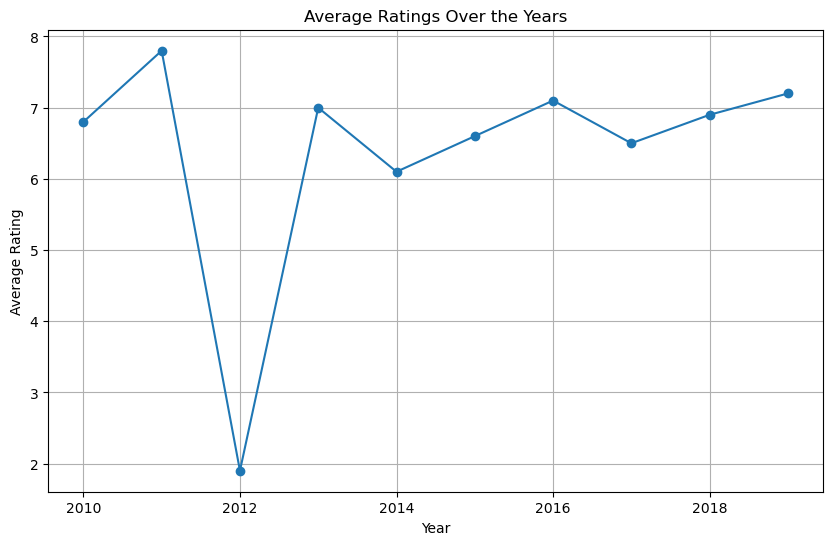

In [203]:
#Query the movie basics and movie ratings table to get average rating data for different years
yearly_avg_ratings_query = """
SELECT  b.year, r.averagerating
FROM movie_basics AS b
JOIN movie_ratings AS r ON b.movie_id = r.movie_id
GROUP BY year
ORDER BY year;
"""

#Extract and display yearly average ratings
yearly_avg_ratings_df = pd.read_sql_query(yearly_avg_ratings_query, conn)
print(yearly_avg_ratings_df) 

#Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_ratings_df['year'], yearly_avg_ratings_df['averagerating'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Ratings Over the Years')
plt.grid(True)
plt.show()

#### 6. Show the correlation between domestic gross and foreign gross over the years

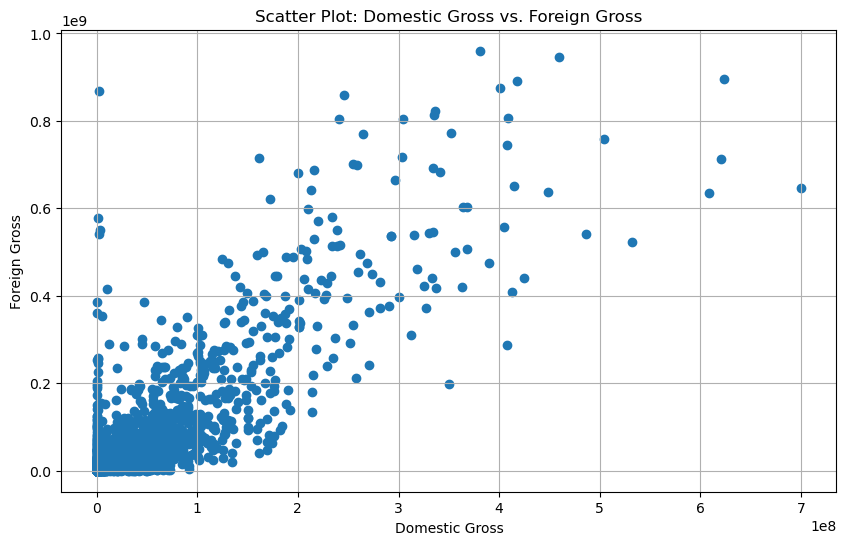

In [250]:
# Convert the values to numeric values
df_csv['domestic_gross'] = pd.to_numeric(df_csv['domestic_gross'], errors='coerce')
df_csv['foreign_gross'] = pd.to_numeric(df_csv['foreign_gross'], errors='coerce')

#Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_csv['domestic_gross'], df_csv['foreign_gross'])
plt.title('Scatter Plot: Domestic Gross vs. Foreign Gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.grid(True)
plt.show()

In [256]:
conn.close()

# Summary
Through this analysis it is clear that it is essential for coming up with strategies when jumping into the movie industry business. From the insights , certain trends have been revealed which is essential for Microsoft in helping them make right decisions and come up with strategies.

